In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost

%matplotlib inline


In [25]:
df = pd.read_csv("BankChurners.csv")  

In [26]:
df.columns
df.drop(axis = 1,columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'CLIENTNUM'], inplace=True)

In [27]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [43]:
sns.pairplot(df, hue='Attrition_Flag', height=5)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [30]:
#@title Defining Plot Multiple Pie function
def PlotMultiplePie(df,categorical_features = None,dropna = False):
    # set a threshold of 30 unique variables, more than 50 can lead to ugly pie charts 
    threshold = 30
    
    # if user did not set categorical_features 
    if categorical_features == None: 
        categorical_features = df.select_dtypes(['object','category']).columns.to_list()
        print(categorical_features)
    
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = df[cat_feature].nunique(dropna = dropna)
        num_missing = df[cat_feature].isna().sum()
        # prints pie chart and info if unique values below threshold 
        if num_unique <= threshold:
            print('Pie Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.pie(df[cat_feature].value_counts(dropna = dropna), values=cat_feature, 
                 names = df[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
            fig.show()
        else: 
            print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')

In [31]:
# Using plot Multiple Pie function to see the distribution of the categorical variables 
PlotMultiplePie(df)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Pie Chart for:  Attrition_Flag
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Gender
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Education_Level
Number of Unique Values:  7
Number of Missing Values:  0


Pie Chart for:  Marital_Status
Number of Unique Values:  4
Number of Missing Values:  0


Pie Chart for:  Income_Category
Number of Unique Values:  6
Number of Missing Values:  0


Pie Chart for:  Card_Category
Number of Unique Values:  4
Number of Missing Values:  0


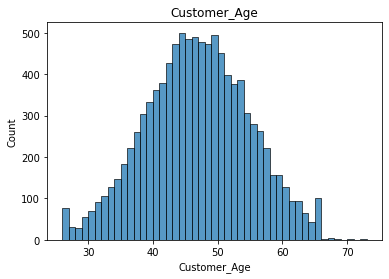

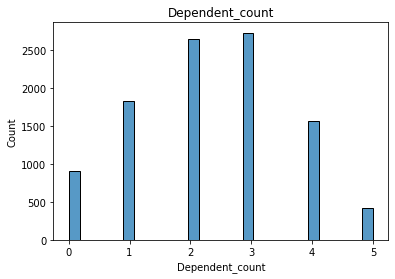

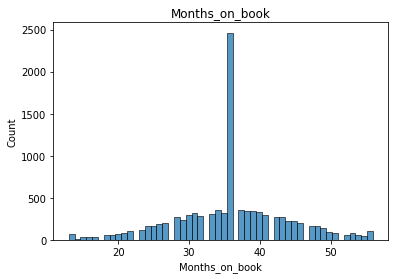

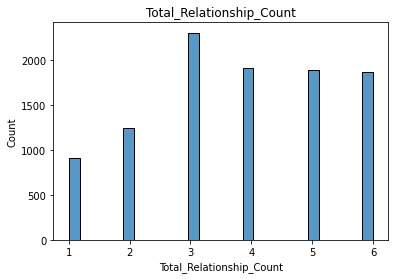

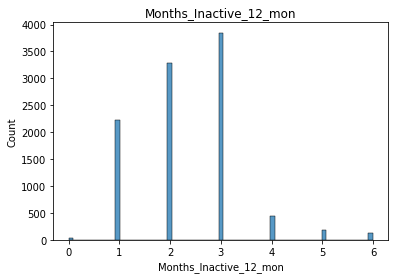

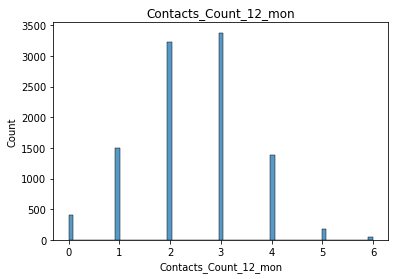

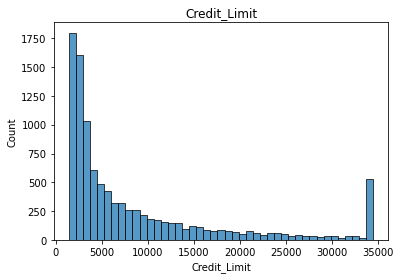

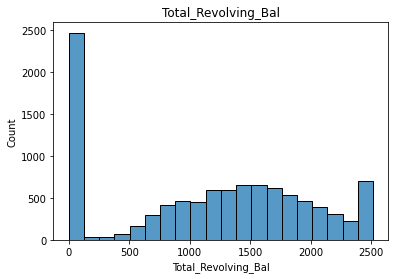

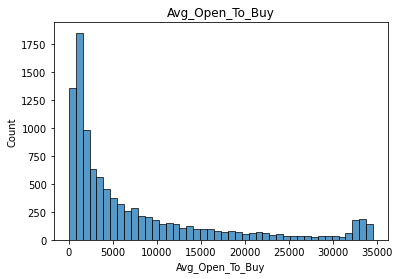

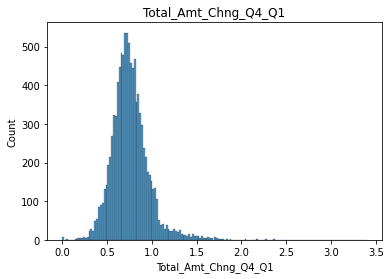

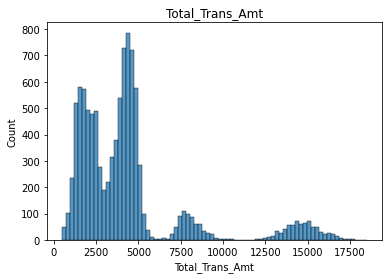

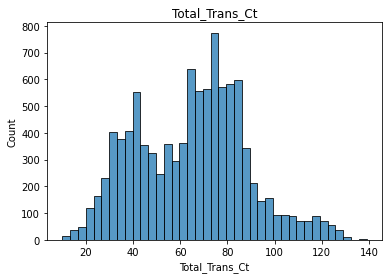

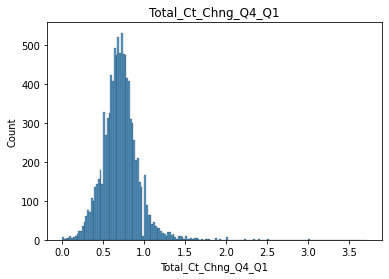

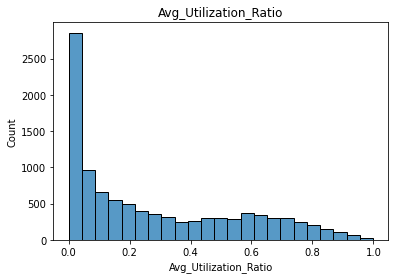

In [32]:
# Print all the numerical features in the dataset 
numerical_features = df.select_dtypes(include=['float64','int64']).columns.to_list()

for feature in numerical_features: 
    plt.figure()
    plt.title(feature)
    ax = sns.histplot(df[feature])

In [33]:
# Convert object types to category type
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x:x.astype('category'))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [35]:
# Coding target variable 
codes = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(codes)
# Splitting 
y = df['Attrition_Flag']
X = df.drop('Attrition_Flag', axis=1)

In [36]:
# One Hot Encoding
dummies = pd.get_dummies(X[X.select_dtypes('category').columns])
X = pd.concat([X,dummies], axis=1).drop(X[X.select_dtypes('category').columns], axis=1)

In [37]:
# Stratified Train-Test split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)

print(y_train.value_counts())
print(y_test.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


In [45]:
#Izvršimo skaliranje:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **RANDOM FOREST**

In [38]:
#RandomForestClassifier
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train,y_train)
pred = RFC.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.96      0.76      0.85       325

    accuracy                           0.96      2026
   macro avg       0.96      0.88      0.91      2026
weighted avg       0.96      0.96      0.95      2026



In [40]:
metrics.confusion_matrix(y_test, pred)

array([[1691,   10],
       [  78,  247]])

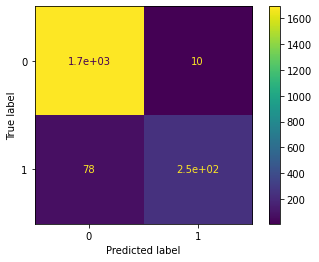

In [41]:
metrics.plot_confusion_matrix(RFC, X_test, y_test)

In [62]:
# RF nad skaliranim podacima
RFC.fit(X_train_scaled, y_train)
pred_scaled = RFC.predict(X_test_scaled)
print(metrics.classification_report(y_test, pred_scaled))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.96      0.75      0.84       325

    accuracy                           0.96      2026
   macro avg       0.96      0.87      0.91      2026
weighted avg       0.96      0.96      0.95      2026



# **PCA + SVM**

In [63]:
# PCA
pca = PCA(n_components=19) 
principalComponents = pca.fit_transform(X_train_scaled)
v=pca.explained_variance_
v

array([4.40172854, 2.55511174, 1.94584691, 1.81091218, 1.74413305,
       1.50640656, 1.38112335, 1.33809036, 1.29494821, 1.25987258,
       1.23004195, 1.19733233, 1.18337463, 1.15242879, 1.12576995,
       1.10031703, 1.07323116, 1.07028938, 1.03931312])

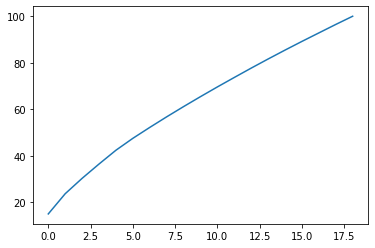

In [50]:
plt.plot(v.cumsum()/v.sum()*100)

In [51]:
pca = PCA(n_components=15) 
principalComponents = pca.fit_transform(X_train_scaled)

In [53]:
clf = svm.SVC()
# tacnost modela sa redukovanim brojem obele\ja
score_scaled_PCA = cross_val_score(svm.SVC(),principalComponents, y_train, cv=5)
np.mean(score_scaled_PCA)

0.8817431702728845

In [54]:
# Tačnost modela sa svih 19 obelezja
score_scaled = cross_val_score(svm.SVC(),X_train_scaled, y_train, cv=5)
np.mean(score_scaled)

0.9089001606994616

In [60]:
# Accuracy with 1-19 features
sc=np.zeros((19))
for i in range(1,19):
  pipe = make_pipeline(StandardScaler(), PCA(n_components = i), svm.SVC()) 
  scores_pipe = cross_val_score(pipe, X_train, y_train, cv = 5)
  np.mean(scores_pipe)
  sc[i]=np.mean(scores_pipe)  

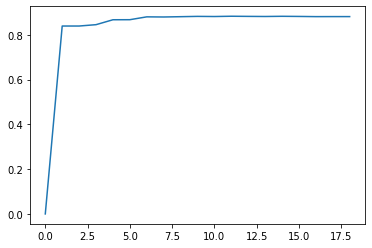

In [61]:
plt.plot(sc)

# **XGBOOST**

In [67]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
prediction_xgb = xgb.predict(X_test)
print(metrics.classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [71]:
metrics.confusion_matrix(y_test, prediction_xgb)

array([[1688,   13],
       [  59,  266]])

# **Logistic Regression**

In [69]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
prediction_lr = logistic.predict(X_test)
print(metrics.classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1701
           1       0.71      0.47      0.56       325

    accuracy                           0.88      2026
   macro avg       0.81      0.72      0.75      2026
weighted avg       0.87      0.88      0.87      2026



In [70]:
metrics.confusion_matrix(y_test, prediction_lr)

array([[1639,   62],
       [ 173,  152]])

# **XGBOOST GRID SEARCH CV**

> Indented block



In [76]:
from sklearn.model_selection import GridSearchCV

grid_params= {
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
gs = GridSearchCV(xgboost.XGBClassifier(),
                 grid_params,
                 verbose = 1,
                 cv = 5,
                 n_jobs = 8)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 10.6min
[Parallel(n_jobs=8)]: Done 1215 out of 1215 | elapsed: 17.9min finished


In [77]:
gs_results

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=8,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7], 'min_child_

In [79]:
xgb_best = xgboost.XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

In [80]:
xgb_best.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [81]:
print(metrics.classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

